In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

This code imports several libraries and modules that are commonly used for data analysis and machine learning tasks. 

The first four lines import the math, numpy, pandas, and matplotlib.pyplot libraries. These libraries provide functions and tools for mathematical calculations, numerical operations, data manipulation, and data visualization, respectively.

The next two lines import the tensorflow and sklearn.metrics modules. TensorFlow is a popular library for building and training machine learning models, while sklearn.metrics provides functions for evaluating the performance of machine learning models, such as calculating mean squared error and mean absolute error.

The last line imports the warnings module and sets a filter to ignore warning messages. This is done to suppress any warning messages that may be generated during the execution of the code.

Overall, this code sets up the necessary dependencies for performing data analysis and machine learning tasks, and it configures the environment to suppress warning messages.

In [2]:
AAPL = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AMZN.csv")

This code reads and loads multiple CSV files into separate variables: AAPL, TSLA, GOOG, MSFT, and AMZN. Each CSV file contains pre-processed data related to different stocks (Apple, Tesla, Google, Microsoft, and Amazon, respectively).

The `pd.read_csv()` function is used to read the CSV files. The file paths specify the location of the CSV files on the Google Drive ("/content/drive/MyDrive/Database/Pre_Processed_*.csv"). By using this function, the code reads the contents of each CSV file and stores it in the respective variable.

After executing this code, the variables AAPL, TSLA, GOOG, MSFT, and AMZN will hold the data from their corresponding CSV files. This allows further manipulation, analysis, or modeling of the stock data for each company separately.

### Data Proprocessing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

This code defines a function named `Dataset` that takes two parameters: `Data` and `Date`. The purpose of this function is to preprocess a given dataset and split it into training and testing sets based on a specified date.

The function begins by extracting the 'Adj. Close' column from the `Data` DataFrame for the dates before the specified `Date`. It converts the extracted data into a NumPy array and assigns it to the `Train_Data` variable.

Next, the code initializes empty lists (`Data_Train`, `Data_Train_X`, `Data_Train_Y`) that will store the training data. It then iterates over the `Train_Data` array in increments of 5, creating subsets of 5 consecutive values. These subsets are appended to the `Data_Train` list.

If the length of the last subset in `Data_Train` is less than 5 (due to incomplete data), it is removed from the list using the `pop()` function.

The next set of operations is similar to the previous steps, but it applies to the testing data. The 'Adj. Close' column from the `Data` DataFrame is extracted for the dates on or after the specified `Date`, and the resulting array is assigned to the `Test_Data` variable. The code then creates subsets of 5 consecutive values from `Test_Data` and appends them to the `Data_Test` list. The last subset is removed if its length is less than 5.

Finally, the collected training and testing data are reshaped into a three-dimensional NumPy array of shape (batch_size, sequence_length, input_dimension) using the `reshape()` function. The training data arrays are assigned to `Data_Train_X` and `Data_Train_Y`, while the testing data arrays are assigned to `Data_Test_X` and `Data_Test_Y`.

The function returns the training and testing data arrays: `Data_Train_X`, `Data_Train_Y`, `Data_Test_X`, and `Data_Test_Y`. These arrays can be used for further analysis or modeling tasks, particularly for time series analysis or sequence prediction problems.

### Model

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

This code defines a function named `Model` that constructs and returns a specific type of machine learning model. The model is built using the TensorFlow library and follows a sequential architecture.

The model consists of several layers, each serving a different purpose. The first layer is an LSTM (Long Short-Term Memory) layer with 200 units. The input shape of this layer is set to (5, 1), indicating that it expects input sequences of length 5 with 1 feature dimension. The activation function used in this layer is a leaky ReLU (Rectified Linear Unit), which introduces a small gradient for negative input values.

The next layer is another LSTM layer with 200 units. It also uses the leaky ReLU activation function. However, unlike the previous layer, this layer does not have the `return_sequences` argument set to True. This means that it only returns the final output of the LSTM layer rather than the full sequence of outputs.

Following the LSTM layers, there are several dense layers. These layers are fully connected layers, meaning that each neuron is connected to every neuron in the previous layer. The dense layers have different numbers of units: 200, 100, 50, and 5, respectively. Each dense layer uses the leaky ReLU activation function.

The model architecture described above forms a sequential stack of layers, with the output of one layer serving as the input for the next layer. The model is then returned by the function.

This function provides a convenient way to create and obtain the specific model configuration defined within it. The returned model can be used for tasks such as regression, classification, or sequence prediction, depending on the nature of the data and the specific problem being addressed.

In [5]:
model = Model()

This line of code creates an instance of the machine learning model defined by the `Model` function. The `Model` function constructs and configures the model architecture using TensorFlow, and this line assigns the constructed model to the variable `model`.

By calling the `Model()` function, the code instantiates the model object, which can be further utilized for training, evaluation, and prediction tasks. The model contains the layers and parameters defined in the `Model` function, such as LSTM layers, dense layers, and activation functions.

Once this line of code is executed, the `model` variable holds the constructed model, and it can be employed to train on data, make predictions, evaluate performance, and perform other operations associated with the machine learning model.

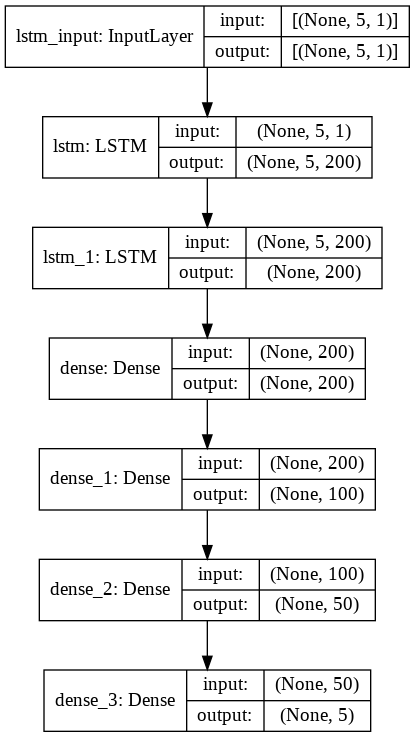

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

This line of code generates a visual representation of the machine learning model using the `plot_model` function from the TensorFlow Keras library. The function takes the `model` object as input and generates a graphical diagram that illustrates the structure of the model.

The resulting model plot provides a visual overview of the different layers and their connections within the model architecture. Each layer is represented as a block, and the arrows between the blocks indicate the flow of data through the model. The plot includes details such as the layer types, shapes of inputs and outputs, and the connections between layers.

The `show_shapes=True` argument is used to display the shape information of the input and output tensors for each layer in the plot. This information can be helpful in understanding the dimensions and flow of data through the model.

By generating this model plot, it becomes easier to visualize and comprehend the structure of the machine learning model. This visual representation aids in understanding the model's design, identifying potential issues or improvements, and communicating the model architecture to others involved in the development or review process.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

This line of code prints a summary of the machine learning model's architecture and parameters. The `summary()` method is a function provided by TensorFlow's Keras library that generates a concise overview of the model.

When executed, this code displays information about each layer in the model, including the layer type, output shape, number of parameters, and the number of trainable parameters. The summary also includes the total number of parameters in the model.

The summary provides a high-level understanding of the model's structure and complexity. It helps in assessing the number of layers, the size of the input and output tensors, and the total number of parameters that need to be learned during training.

This information is valuable for model evaluation and debugging purposes. It allows you to quickly check if the model is configured as intended, verify that the input and output shapes match the data requirements, and get insights into the complexity of the model in terms of trainable parameters.

By examining the model summary, you can gain a better understanding of the overall structure and characteristics of the machine learning model. This can help guide further analysis, optimization, and interpretation of the model's performance.

### Custom Learning Rate

In [8]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

This code defines a function named `scheduler` that takes an `epoch` parameter as input. The purpose of this function is to adjust and return the learning rate (lrate) based on the value of the epoch.

The function begins by checking the value of the `epoch` parameter. If the epoch is less than or equal to 150, the learning rate is calculated as a fraction of 10^-5, with the fraction increasing as the epoch progresses. This means that the learning rate starts small and gradually increases over the initial epochs.

If the epoch is greater than 150 but less than or equal to 400, a different formula is used to calculate the learning rate. The initial learning rate is set to 10^-5, and the learning rate is exponentially decreased based on the value of `epoch`. The decay rate is controlled by the constant `k` and is used to gradually reduce the learning rate over time.

If the epoch is greater than 400, the learning rate is set to a fixed value of 10^-6. This means that after 400 epochs, the learning rate remains constant at a very low value.

The calculated learning rate is returned as the output of the function.

This `scheduler` function provides a way to dynamically adjust the learning rate during the training process. The learning rate schedule defined in this function allows for a varying learning rate based on the progress of the training epochs. Such dynamic learning rate schedules can help improve the performance and convergence of machine learning models by adapting the learning rate to the characteristics of the optimization problem.

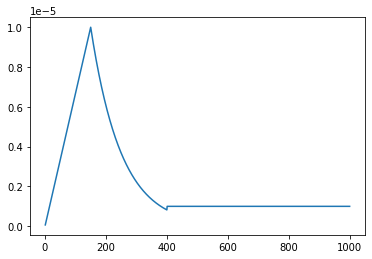

In [9]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

This code generates a plot of the learning rate values over a range of epochs. 

The first line of code creates a list `epochs` that contains values from 1 to 1000 (inclusive) with a step size of 1. This list represents the range of epochs for which the learning rate will be calculated.

The second line of code creates another list `lrate` by applying the `scheduler` function to each value in the `epochs` list. The `scheduler` function calculates the learning rate based on the given epoch value. Thus, the `lrate` list contains the corresponding learning rate values for each epoch in the `epochs` list.

Finally, the third line of code uses the `plt.plot()` function from the matplotlib.pyplot library to create a line plot. It takes the `epochs` list as the x-axis values and the `lrate` list as the y-axis values. This generates a line graph that illustrates how the learning rate changes over the range of epochs.

By plotting the learning rate values against the corresponding epochs, this code provides a visual representation of how the learning rate varies during the training process. This information can be helpful in understanding how the learning rate schedule affects the model's performance and convergence. It allows for analysis and fine-tuning of the learning rate strategy, ensuring optimal learning rate selection for improved model training.

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

This line of code creates a callback object named `callback` that utilizes a learning rate scheduler during the training process of a machine learning model. 

The `tf.keras.callbacks.LearningRateScheduler()` function is used to construct the callback object. It takes the `scheduler` function as an argument. The `scheduler` function determines the learning rate based on the epoch number.

During the model training process, the callback object `callback` is passed to the model's training routine, such as the `fit()` function. The callback is responsible for modifying the learning rate of the model at specific intervals, as defined by the `scheduler` function.

The learning rate scheduler callback adjusts the learning rate dynamically during training based on the current epoch. This can be beneficial for improving the training process by adapting the learning rate to the changing requirements of the model as it progresses through different stages of optimization.

By utilizing the learning rate scheduler callback, the model can automatically adjust its learning rate without manual intervention. This can lead to better model convergence, faster training, and improved overall performance.

Apple

In [11]:
AAPL.head()

Date   Open   High    Low  Close  Adj. Close       Volume
0  2015-01-02  27.85  27.86  26.84  27.33       24.86  212818400.0
1  2015-01-05  27.07  27.16  26.35  26.56       24.16  257142000.0
2  2015-01-06  26.64  26.86  26.16  26.57       24.16  263188400.0
3  2015-01-07  26.80  27.05  26.67  26.94       24.50  160423600.0
4  2015-01-08  27.31  28.04  27.17  27.97       25.44  237458000.0

This code retrieves the first few rows of the AAPL DataFrame and displays them. The `.head()` function is a method provided by the pandas library that allows us to inspect the top portion of a DataFrame.

When executed, this code prints the first few rows of the AAPL DataFrame, showing the data contained in the DataFrame's columns. By default, it displays the first five rows, but this can be customized by passing a specific number as an argument to the `.head()` function.

The purpose of using `.head()` is to quickly get an overview of the data in the AAPL DataFrame. By inspecting the top rows, we can examine the column names and the values in the dataset, which helps in understanding the structure and content of the data.

This information is useful for data exploration, data cleaning, and gaining initial insights into the dataset. It allows us to verify if the data is loaded correctly and provides a glimpse into the format and content of the AAPL DataFrame.

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides summary information about the AAPL DataFrame. The `.info()` function is a method provided by the pandas library that displays a concise summary of the DataFrame's structure and contents.

When executed, this code outputs essential details about the AAPL DataFrame, including the column names, the number of non-null values in each column, and the data types of the columns. Additionally, it provides an overall summary that includes the total number of entries (rows) in the DataFrame.

The purpose of using `.info()` is to obtain an overview of the dataset's structure and characteristics. It helps in understanding the data types of each column, identifying missing or null values, and estimating the memory usage of the DataFrame.

This information is valuable for data exploration, data cleaning, and initial data analysis. It allows us to assess the quality and completeness of the data, determine if any data type conversions or missing value handling is necessary, and make informed decisions regarding further data processing or analysis.

By using `.info()`, we gain insights into the basic properties of the AAPL DataFrame, enabling us to proceed with subsequent data manipulations and analysis with a clearer understanding of the data's composition.

In [13]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

This code converts the data type of the "Date" column in the AAPL DataFrame to the datetime format using the `pd.to_datetime()` function provided by the pandas library.

By executing this code, the "Date" column in the AAPL DataFrame is transformed from its original data type (presumably a string or another format) into the datetime format. The datetime format is a standardized representation of dates and times that allows for easier manipulation and analysis of temporal data.

The `pd.to_datetime()` function takes the "Date" column as input and converts its values into the datetime format. This conversion ensures that the "Date" column is interpreted as dates rather than mere text or numbers.

Changing the data type of the "Date" column to datetime facilitates various operations, such as filtering or sorting the DataFrame based on dates, extracting specific components (year, month, day) from the dates, calculating time differences, and performing time-based analysis.

Overall, this code ensures that the "Date" column in the AAPL DataFrame is recognized as datetime data, enabling seamless handling and utilization of temporal information within the dataset.

Split the Data into Training and Test set.
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

This code assigns values to variables and calls the `Dataset` function to split the AAPL dataset into training and testing sets based on a specified date.

The first line of code assigns the value '2020-10-01' to the variable `AAPL_Date`. This represents the date that will be used as a reference point for splitting the data.

The second line of code calls the `Dataset` function, passing the AAPL dataset and the `AAPL_Date` as arguments. The `Dataset` function is responsible for performing the actual splitting of the data.

The `Dataset` function takes the AAPL dataset and the `AAPL_Date` as inputs and returns four sets of data: `AAPL_Train_X`, `AAPL_Train_Y`, `AAPL_Test_X`, and `AAPL_Test_Y`.

`AAPL_Train_X` and `AAPL_Train_Y` represent the training data, where `AAPL_Train_X` contains the input features and `AAPL_Train_Y` contains the corresponding output labels or target values.

`AAPL_Test_X` and `AAPL_Test_Y` represent the testing data, where `AAPL_Test_X` contains the input features for testing and `AAPL_Test_Y` contains the corresponding expected output labels or target values for evaluation.

By calling the `Dataset` function and assigning the returned values to specific variables, this code organizes the AAPL dataset into separate training and testing sets, which can be further used for training a machine learning model, evaluating its performance, or conducting any other analysis related to the dataset.

### Model Fitting

In [15]:
AAPL_Model = Model()

This code creates an instance of a machine learning model for the AAPL dataset. 

The line of code initializes a variable named `AAPL_Model` and assigns it the value returned by the `Model()` function. The `Model()` function is responsible for constructing and configuring the specific machine learning model architecture.

By calling the `Model()` function, the code instantiates the `AAPL_Model` object, which represents the machine learning model tailored for the AAPL dataset.

The `AAPL_Model` object encapsulates the architecture, parameters, and functionality defined within the `Model()` function. It can be utilized to perform various tasks, such as training the model on the AAPL training data, making predictions, evaluating the model's performance, or conducting any other operations associated with the machine learning model.

Overall, this code sets up the `AAPL_Model` object as an instance of the machine learning model specific to the AAPL dataset, enabling further utilization of the model for analysis, prediction, and other tasks related to the AAPL stock data.

In [16]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation settings for the `AAPL_Model` machine learning model.

The `compile()` function is a method provided by the TensorFlow Keras library that allows for the specification of various settings for training the model. It takes several arguments to define the optimizer, loss function, and metrics to be used during the training process.

In this specific code, the `optimizer` argument is set to `tf.keras.optimizers.Adam()`, which initializes the Adam optimizer. The optimizer determines how the model's weights are updated during training, and Adam is a popular optimization algorithm widely used in deep learning.

The `loss` argument is set to 'mse', which stands for mean squared error. This indicates that the mean squared error is used as the loss function to measure the discrepancy between the predicted outputs and the true outputs during training.

The `metrics` argument is set to `tf.keras.metrics.RootMeanSquaredError()`, which initializes the root mean squared error (RMSE) as the evaluation metric. The RMSE metric provides a measure of how well the model performs in terms of the average difference between the predicted and true outputs.

By configuring these settings through the `compile()` function, the code prepares the `AAPL_Model` for the training process, specifying the optimization algorithm, loss function, and evaluation metric to be used. These settings play a crucial role in training the model effectively and assessing its performance accurately.

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

This code trains the `AAPL_Model` machine learning model using the training data (`AAPL_Train_X` and `AAPL_Train_Y`) and evaluates its performance on the testing data (`AAPL_Test_X` and `AAPL_Test_Y`).

The `fit()` method is a function provided by the TensorFlow Keras library that performs the training process for a machine learning model. It takes several arguments to specify the training data, the number of training epochs, the validation data for evaluation, and any additional callbacks to be utilized during training.

In this specific code, `AAPL_Train_X` and `AAPL_Train_Y` are passed as the training data, representing the input features and the corresponding output labels, respectively.

The `epochs` argument is set to 1000, indicating the number of times the training data will be iterated over during the training process. Each epoch represents a complete pass through the entire training dataset.

The `validation_data` argument is set to `(AAPL_Test_X, AAPL_Test_Y)`, providing the testing data as a validation set during training. This allows for monitoring the model's performance on unseen data and helps in assessing its generalization ability.

The `callbacks` argument is set to `[callback]`, where `callback` refers to a callback object (such as a learning rate scheduler) defined earlier. Callbacks provide additional functionalities during training, such as modifying the learning rate or saving the model's checkpoints.

By executing this code, the `AAPL_Model` is trained using the specified training data and settings. The model's performance is evaluated on the testing data after each epoch, and the training history is stored in the `AAPL_hist` object, which can be used to analyze the model's training progress and performance metrics.

Overall, this code initiates and manages the training process for the `AAPL_Model`, allowing it to learn from the training data and improve its performance over the specified number of epochs.

In [18]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts the training history of the `AAPL_Model` after the training process is completed. It captures the values of different metrics recorded during training and organizes them into separate variables for further analysis and visualization.

The first line of code assigns the `history_dict` variable to store the history of the `AAPL_Model`. The `history` attribute of the `AAPL_hist` object contains various recorded metrics such as loss, root mean squared error (RMSE), validation loss, and validation RMSE.

The subsequent lines of code extract the individual metric values from the `history_dict` and assign them to separate variables for ease of use.

- The `loss` variable stores the values of the loss metric recorded during the training epochs.
- The `root_mean_squared_error` variable stores the values of the RMSE metric recorded during the training epochs.
- The `val_loss` variable stores the values of the validation loss metric recorded during the training epochs.
- The `val_root_mean_squared_error` variable stores the values of the validation RMSE metric recorded during the training epochs.

Finally, the `epochs` variable is assigned to a range of values from 1 to the length of the `loss` variable plus one. This range represents the number of epochs and will be used as the x-axis values when visualizing the training history.

By capturing and organizing the training history metrics in separate variables, this code enables further analysis, plotting, or interpretation of the model's performance throughout the training process. These metrics provide insights into the model's convergence, improvement, and generalization ability over the epochs.

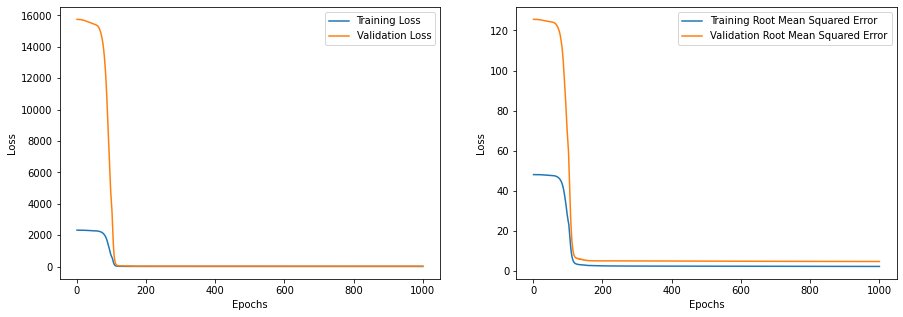

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code generates a visualization that displays the training history of the `AAPL_Model` in the form of two line plots side by side.

The first line of code creates a figure (`fig`) with two subplots (`ax1` and `ax2`) arranged horizontally (side by side) using the `plt.subplots()` function from the matplotlib.pyplot library.

The following two lines of code adjust the size of the figure, setting its height to 5 units and width to 15 units using the `set_figheight()` and `set_figwidth()` methods of the `fig` object.

Next, the code proceeds to plot the training history metrics on the subplots. For `ax1`, the code plots the training loss (`loss`) and the validation loss (`val_loss`) as functions of the number of epochs (`epochs`). The plot is labeled accordingly, with the x-axis labeled as "Epochs" and the y-axis labeled as "Loss". A legend is added to differentiate between the training loss and validation loss.

Similarly, for `ax2`, the code plots the training root mean squared error (`root_mean_squared_error`) and the validation root mean squared error (`val_root_mean_squared_error`) as functions of the number of epochs (`epochs`). The plot is labeled accordingly, with the x-axis labeled as "Epochs" and the y-axis labeled as "Root Mean Squared Error". A legend is added to differentiate between the training RMSE and validation RMSE.

Finally, the `plt.show()` function is called to display the generated plot.

By executing this code, two line plots are generated side by side, presenting the training history of the `AAPL_Model` in terms of loss and RMSE metrics. This visualization helps in understanding the progress and performance of the model over the training epochs, allowing for assessment and interpretation of its training behavior and convergence.

### Predicting the closing stock price of Apple

In [20]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

This code makes predictions using the `AAPL_Model` machine learning model on the testing data (`AAPL_Test_X`).

The `predict()` function is a method provided by the TensorFlow Keras library that allows for making predictions with a trained model. In this specific code, the `AAPL_Test_X` data is passed as an argument to the `predict()` function.

By executing this code, the `AAPL_Model` generates predictions for the input features provided in `AAPL_Test_X`. These predictions represent the model's estimated outputs or target values for the corresponding input samples in the testing data.

The `AAPL_prediction` variable is assigned the predicted values generated by the model. These predictions can be used for various purposes, such as evaluating the model's performance on the testing data, comparing them with the true target values (`AAPL_Test_Y`), or making predictions for new, unseen data.

By making predictions using the trained model on the testing data, this code enables the evaluation and analysis of the model's performance and its ability to generalize to unseen data. It facilitates further analysis or decision-making based on the model's predictions in the context of the AAPL dataset.

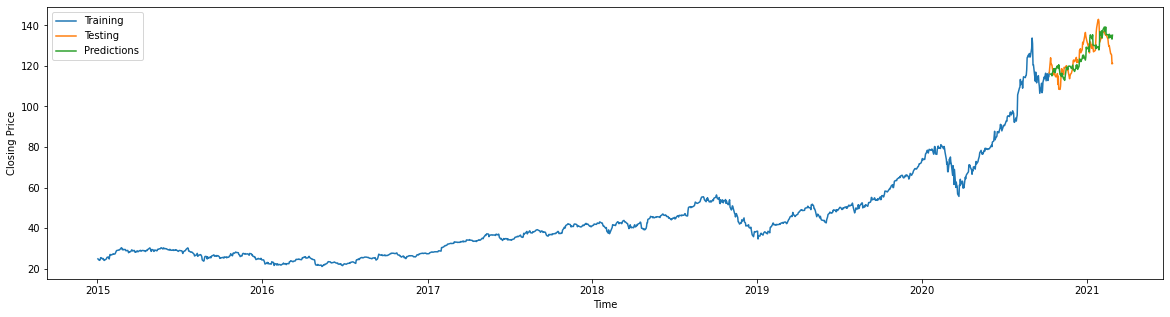

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

This code generates a line plot to visualize the closing prices of the AAPL stock, as well as the training data, testing data, and predictions made by the model.

The first line of code sets the figure size of the plot to 20 units in width and 5 units in height using the `plt.figure(figsize=(20, 5))` function from the matplotlib.pyplot library.

The next three lines of code create the line plots. The first plot represents the training data, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] < '2020-10-12']`) and the y-axis values are the corresponding adjusted closing prices (`AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12']`). The second plot represents the testing data, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] >= '2020-10-09']`) and the y-axis values are the corresponding adjusted closing prices (`AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09']`). The third plot represents the predictions made by the model, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] >= '2020-10-12']`) and the y-axis values are the predicted closing prices (`AAPL_prediction.reshape(-1)`).

The following lines of code set the x-axis label to "Time" and the y-axis label to "Closing Price" using the `plt.xlabel()` and `plt.ylabel()` functions, respectively.

The `plt.legend(loc='best')` line adds a legend to the plot, which identifies the lines in the plot. The `loc='best'` argument automatically determines the best position for the legend based on the available space in the plot.

By executing this code, a line plot is generated to visualize the closing prices of the AAPL stock over time, along with the training data, testing data, and model predictions. This visualization aids in understanding the performance of the model's predictions in relation to the actual closing prices and provides a visual representation of the model's accuracy and performance.

In [22]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.822911467470171
MAPE: 0.030390689646776783


This code calculates and prints the values of two evaluation metrics, RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error), for assessing the performance of the model's predictions on the AAPL testing data.

The first line of code calculates the RMSE using the `mean_squared_error()` function from the sklearn.metrics module. It compares the predicted values (`AAPL_prediction`) with the true values (`AAPL_Test_Y.reshape(-1, 5)`) and calculates the mean squared error. The `math.sqrt()` function is then used to take the square root of the mean squared error, giving us the RMSE value.

The second line of code calculates the MAPE using the `np.mean()` and `np.abs()` functions from the numpy library. It calculates the absolute percentage error for each prediction by taking the absolute difference between the predicted values and the true values, dividing it by the absolute true values, and then averaging these values using `np.mean()`.

The `print()` function is used to display the calculated values of RMSE and MAPE. The `f-string` notation (`f'RMSE: {rmse}'` and `f'MAPE: {mape}'`) is used to format the output and insert the calculated metric values into the printed string.

By executing this code, the RMSE and MAPE values are calculated and displayed, providing quantitative measures of the model's accuracy and performance on the AAPL testing data. RMSE represents the average difference between the predicted and true values, while MAPE represents the average percentage error of the predictions. These metrics help assess the quality and reliability of the model's predictions and are commonly used in evaluating regression models.

Tesla

In [23]:
TSLA.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  44.57  44.65  42.65  43.86       43.86  23822000.0
1  2015-01-05  42.91  43.30  41.43  42.02       42.02  26842500.0
2  2015-01-06  42.01  42.84  40.84  42.26       42.26  31309500.0
3  2015-01-07  42.67  42.96  41.96  42.19       42.19  14842000.0
4  2015-01-08  42.56  42.76  42.00  42.12       42.12  17212500.0

This code displays the first few rows of the TSLA DataFrame. The `.head()` function is a method provided by the pandas library that allows us to inspect the top portion of a DataFrame.

When executed, this code prints the first few rows of the TSLA DataFrame, showing the data contained in the DataFrame's columns. By default, it displays the first five rows, but this can be customized by passing a specific number as an argument to the `.head()` function.

The purpose of using `.head()` is to quickly get an overview of the data in the TSLA DataFrame. By inspecting the top rows, we can examine the column names and the values in the dataset, which helps in understanding the structure and content of the data.

This information is useful for data exploration, data cleaning, and gaining initial insights into the dataset. It allows us to verify if the data is loaded correctly and provides a glimpse into the format and content of the TSLA DataFrame.

In [24]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides summary information about the TSLA DataFrame. The `.info()` function is a method provided by the pandas library that displays a concise summary of the DataFrame's structure and contents.

When executed, this code outputs essential details about the TSLA DataFrame, including the column names, the number of non-null values in each column, and the data types of the columns. Additionally, it provides an overall summary that includes the total number of entries (rows) in the DataFrame.

The purpose of using `.info()` is to obtain an overview of the dataset's structure and characteristics. It helps in understanding the data types of each column, identifying missing or null values, and estimating the memory usage of the DataFrame.

This information is valuable for data exploration, data cleaning, and initial data analysis. It allows us to assess the quality and completeness of the data, determine if any data type conversions or missing value handling is necessary, and make informed decisions regarding further data processing or analysis.

By using `.info()`, we gain insights into the basic properties of the TSLA DataFrame, enabling us to proceed with subsequent data manipulations and analysis with a clearer understanding of the data's composition.

In [25]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

This code changes the data type of the "Date" column in the TSLA DataFrame to the datetime format using the `pd.to_datetime()` function provided by the pandas library.

By executing this code, the "Date" column in the TSLA DataFrame is transformed from its original data type (presumably a string or another format) into the datetime format. The datetime format is a standardized representation of dates and times that allows for easier manipulation and analysis of temporal data.

The `pd.to_datetime()` function takes the "Date" column as input and converts its values into the datetime format. This conversion ensures that the "Date" column is interpreted as dates rather than mere text or numbers.

Changing the data type of the "Date" column to datetime facilitates various operations, such as filtering or sorting the DataFrame based on dates, extracting specific components (year, month, day) from the dates, calculating time differences, and performing time-based analysis.

Overall, this code ensures that the "Date" column in the TSLA DataFrame is recognized as datetime data, enabling seamless handling and utilization of temporal information within the dataset.

Split the Data into Training and Test set.
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [26]:
TSLA_Date = '2020-10-01'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA, TSLA_Date)

This code prepares the TSLA dataset for training and testing by splitting it into four sets of data: TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, and TSLA_Test_Y.

The first line of code assigns the value '2020-10-01' to the variable `TSLA_Date`. This represents the date that will be used as a reference point for splitting the data.

The second line of code calls the `Dataset` function, passing the TSLA dataset and `TSLA_Date` as arguments. The `Dataset` function is responsible for performing the actual splitting of the data.

The `Dataset` function takes the TSLA dataset and the `TSLA_Date` as inputs and returns four sets of data: `TSLA_Train_X`, `TSLA_Train_Y`, `TSLA_Test_X`, and `TSLA_Test_Y`.

`TSLA_Train_X` and `TSLA_Train_Y` represent the training data, where `TSLA_Train_X` contains the input features and `TSLA_Train_Y` contains the corresponding output labels or target values.

`TSLA_Test_X` and `TSLA_Test_Y` represent the testing data, where `TSLA_Test_X` contains the input features for testing and `TSLA_Test_Y` contains the corresponding expected output labels or target values for evaluation.

By calling the `Dataset` function and assigning the returned values to specific variables, this code organizes the TSLA dataset into separate training and testing sets, which can be further used for training a machine learning model, evaluating its performance, or conducting any other analysis related to the dataset.

### Model Fitting

In [27]:
TSLA_Model = Model()

This code creates an instance of a machine learning model specifically designed for the TSLA dataset.

The line of code initializes a variable named `TSLA_Model` and assigns it the value returned by the `Model()` function. The `Model()` function is responsible for constructing and configuring the specific machine learning model architecture.

By calling the `Model()` function, the code instantiates the `TSLA_Model` object, which represents the machine learning model tailored for the TSLA dataset.

The `TSLA_Model` object encapsulates the architecture, parameters, and functionality defined within the `Model()` function. It can be utilized to perform various tasks, such as training the model on the TSLA training data, making predictions, evaluating the model's performance, or conducting any other operations associated with the machine learning model.

Overall, this code sets up the `TSLA_Model` object as an instance of the machine learning model specific to the TSLA dataset, enabling further utilization of the model for analysis, prediction, and other tasks related to the TSLA stock data.

In [28]:
TSLA_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation settings for the `TSLA_Model` machine learning model.

The `compile()` function is a method provided by the TensorFlow Keras library that allows for specifying various settings for training the model. It takes several arguments to define the optimizer, loss function, and metrics to be used during the training process.

In this specific code, the `optimizer` argument is set to `tf.keras.optimizers.Adam()`, which initializes the Adam optimizer. The optimizer determines how the model's weights are updated during training, and Adam is a popular optimization algorithm widely used in deep learning.

The `loss` argument is set to 'mse', which stands for mean squared error. This indicates that the mean squared error is used as the loss function to measure the discrepancy between the predicted outputs and the true outputs during training.

The `metrics` argument is set to `tf.keras.metrics.RootMeanSquaredError()`, which initializes the root mean squared error (RMSE) as the evaluation metric. The RMSE metric provides a measure of how well the model performs in terms of the average difference between the predicted and true outputs.

By configuring these settings through the `compile()` function, the code prepares the `TSLA_Model` for the training process, specifying the optimization algorithm, loss function, and evaluation metric to be used. These settings play a crucial role in training the model effectively and assessing its performance accurately.

In [ ]:
TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

This code trains the `TSLA_Model` machine learning model using the training data (`TSLA_Train_X` and `TSLA_Train_Y`) and evaluates its performance on the testing data (`TSLA_Test_X` and `TSLA_Test_Y`).

The `fit()` method is a function provided by the TensorFlow Keras library that performs the training process for a machine learning model. It takes several arguments to specify the training data, the number of training epochs, the validation data for evaluation, and any additional callbacks to be utilized during training.

In this specific code, `TSLA_Train_X` and `TSLA_Train_Y` are passed as the training data, representing the input features and the corresponding output labels, respectively.

The `epochs` argument is set to 200, indicating the number of times the training data will be iterated over during the training process. Each epoch represents a complete pass through the entire training dataset.

The `validation_data` argument is set to `(TSLA_Test_X, TSLA_Test_Y)`, providing the testing data as a validation set during training. This allows for monitoring the model's performance on unseen data and helps in assessing its generalization ability.

The `callbacks` argument is set to `[callback]`, where `callback` refers to a callback object (such as a learning rate scheduler) defined earlier. Callbacks provide additional functionalities during training, such as modifying the learning rate or saving the model's checkpoints.

By executing this code, the `TSLA_Model` is trained using the specified training data and settings. The model's performance is evaluated on the testing data after each epoch, and the training history is stored in the `TSLA_hist` object, which can be used to analyze the model's training progress and performance metrics.

Overall, this code initiates and manages the training process for the `TSLA_Model`, allowing it to learn from the training data and improve its performance over the specified number of epochs.

In [30]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts the training history of the `TSLA_Model` after the training process is completed. It captures the values of different metrics recorded during training and organizes them into separate variables for further analysis and visualization.

The first line of code assigns the `history_dict` variable to store the history of the `TSLA_Model`. The `history` attribute of the `TSLA_hist` object contains various recorded metrics such as loss, root mean squared error (RMSE), validation loss, and validation RMSE.

The subsequent lines of code extract the individual metric values from the `history_dict` and assign them to separate variables for ease of use.

- The `loss` variable stores the values of the loss metric recorded during the training epochs.
- The `root_mean_squared_error` variable stores the values of the RMSE metric recorded during the training epochs.
- The `val_loss` variable stores the values of the validation loss metric recorded during the training epochs.
- The `val_root_mean_squared_error` variable stores the values of the validation RMSE metric recorded during the training epochs.

Finally, the `epochs` variable is assigned to a range of values from 1 to the length of the `loss` variable plus one. This range represents the number of epochs and will be used as the x-axis values when visualizing the training history.

By capturing and organizing the training history metrics in separate variables, this code enables further analysis, plotting, or interpretation of the model's performance throughout the training process. These metrics provide insights into the model's convergence, improvement, and generalization ability over the epochs.

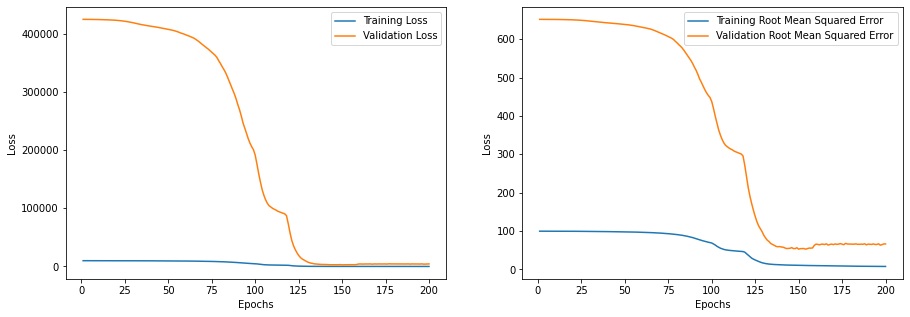

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code generates a figure with two subplots and plots the training history metrics of the `TSLA_Model` on each subplot using the matplotlib.pyplot library.

The first line of code initializes a figure with two subplots (`ax1` and `ax2`) arranged side by side. The number of rows and columns in the subplot grid is specified as 1 row and 2 columns, respectively.

The following two lines of code adjust the size of the figure. The `set_figheight()` function sets the height of the figure to 5 units, and the `set_figwidth()` function sets the width of the figure to 15 units.

Next, the code proceeds to plot the training history metrics on each subplot. For `ax1`, two line plots are created. One plot represents the training loss (`loss`) as a function of the number of epochs (`epochs`), and the other plot represents the validation loss (`val_loss`). These plots are labeled accordingly, with the x-axis labeled as "Epochs" and the y-axis labeled as "Loss". A legend is added to distinguish between the training loss and validation loss.

Similarly, for `ax2`, two line plots are created. One plot represents the training root mean squared error (RMSE) (`root_mean_squared_error`) as a function of the number of epochs, and the other plot represents the validation RMSE (`val_root_mean_squared_error`). The x-axis is labeled as "Epochs", and the y-axis is labeled as "Loss". A legend is added to differentiate between the training RMSE and validation RMSE.

Finally, the `plt.show()` function is called to display the generated plot.

By executing this code, a figure with two subplots is generated, each containing line plots of the training history metrics of the `TSLA_Model`. This visualization provides a clear representation of the training progress and performance of the model, allowing for easy comparison and interpretation of the loss and RMSE metrics over the course of the training epochs.

### Predicting the closing stock price of Tesla

In [32]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)

This code uses the trained `TSLA_Model` to make predictions on the testing data (`TSLA_Test_X`).

The `predict()` function is a method provided by the TensorFlow Keras library that allows for making predictions using a trained model. In this specific code, the `TSLA_Test_X` data is passed as an argument to the `predict()` function.

By executing this code, the `TSLA_Model` generates predictions for the input features provided in `TSLA_Test_X`. These predictions represent the model's estimated outputs or target values for the corresponding input samples in the testing data.

The `TSLA_prediction` variable is assigned the predicted values generated by the model. These predictions can be used for various purposes, such as evaluating the model's performance on the testing data, comparing them with the true target values (`TSLA_Test_Y`), or making predictions for new, unseen data.

By making predictions using the trained model on the testing data, this code enables the evaluation and analysis of the model's performance and its ability to generalize to unseen data. It facilitates further analysis or decision-making based on the model's predictions in the context of the TSLA dataset.

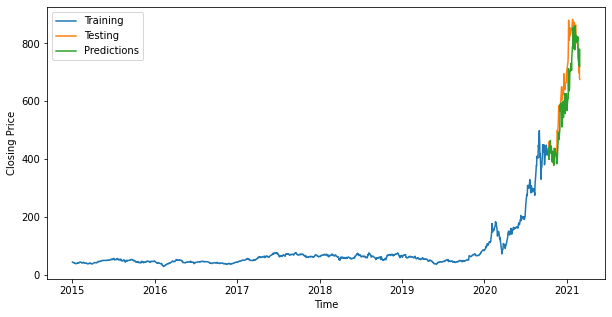

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'][TSLA['Date'] < '2020-10-12'], TSLA['Adj. Close'][TSLA['Date'] < '2020-10-12'], label = 'Training')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-09'], TSLA['Adj. Close'][TSLA['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-12'], TSLA_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

This code generates a plot visualizing the historical stock price data of TSLA, along with the training data, testing data, and the model's predictions.

The first line of code sets the figure size to (10, 5), specifying the width and height of the plot in inches.

The subsequent lines of code create the line plots. Three separate lines are plotted on the same figure:

- The first line plot represents the historical stock prices of TSLA for the training period. It uses the 'Date' column of the TSLA DataFrame to filter the corresponding dates that fall before '2020-10-12'. The 'Adj. Close' column is used to plot the closing prices. This line is labeled as 'Training'.

- The second line plot represents the historical stock prices of TSLA for the testing period. It uses the 'Date' column of the TSLA DataFrame to filter the corresponding dates that are on or after '2020-10-09'. The 'Adj. Close' column is used to plot the closing prices. This line is labeled as 'Testing'.

- The third line plot represents the model's predictions for the testing period. It uses the 'Date' column of the TSLA DataFrame to filter the corresponding dates that are on or after '2020-10-12'. The `TSLA_prediction` variable, which contains the predicted closing prices, is plotted against these dates. This line is labeled as 'Predictions'.

Additional code lines set the x-axis label to 'Time', the y-axis label to 'Closing Price', and add a legend to identify the different lines on the plot.

By executing this code, a plot is generated showing the historical stock prices of TSLA, along with the training data, testing data, and the model's predictions. This visualization provides a clear representation of the actual stock prices, the model's performance in predicting the prices, and the periods used for training and testing. It allows for a visual comparison between the observed prices and the model's predictions, aiding in assessing the model's accuracy and effectiveness in capturing the underlying patterns in the TSLA stock data.

In [34]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 66.40686299614501
MAPE: 0.07223948908878701


This code calculates and prints two evaluation metrics, RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error), to assess the performance of the model's predictions compared to the true values.

The first line of code calculates the RMSE between the true target values (`TSLA_Test_Y`) and the model's predictions (`TSLA_prediction`). The `mean_squared_error()` function from the scikit-learn library is used to compute the mean squared error between the two sets of values. The `math.sqrt()` function is then applied to take the square root of the mean squared error, resulting in the RMSE.

The second line of code calculates the MAPE between the true target values and the model's predictions. The `np.abs()` function is used to compute the absolute difference between the predicted values and the true values, and the result is divided by the absolute true values. These values are then averaged using the `np.mean()` function to obtain the MAPE.

The third line of code prints the calculated RMSE using a formatted string. The value of `rmse` is displayed in place of `{rmse}`.

The fourth line of code prints the calculated MAPE using a formatted string. The value of `mape` is displayed in place of `{mape}`.

By executing this code, the RMSE and MAPE metrics are computed and displayed, providing quantitative measures of the model's performance in terms of the accuracy and percentage error of its predictions. These metrics serve as indicators of how well the model aligns with the true values, allowing for an assessment of the model's effectiveness in capturing the patterns and trends in the TSLA stock data.

Google

In [35]:
GOOG.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  527.56  529.82  522.67  523.37      523.37  1447563.0
1  2015-01-05  521.83  522.89  511.66  512.46      512.46  2059840.0
2  2015-01-06  513.59  514.76  499.68  500.59      500.59  2899940.0
3  2015-01-07  505.61  505.86  498.28  499.73      499.73  2065054.0
4  2015-01-08  496.63  502.10  489.66  501.30      501.30  3353582.0

This code retrieves the first few rows of data from the GOOG DataFrame.

The `head()` function is a method provided by the pandas library that allows for inspecting the top rows of a DataFrame. By calling `GOOG.head()`, the code retrieves the first few rows of the GOOG DataFrame, displaying them in the output.

The purpose of using `head()` is to quickly get a glimpse of the structure and content of the GOOG DataFrame. It provides a concise summary of the data, including the column names and the initial rows, which can be useful for understanding the dataset and performing initial exploratory analysis.

By executing this code, the output will show the first few rows of the GOOG DataFrame, giving an overview of the data contained within and allowing for a preliminary understanding of its format and values.

In [36]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides detailed information about the structure and content of the GOOG DataFrame.

The `info()` function is a method provided by the pandas library that displays a summary of the DataFrame's metadata. By calling `GOOG.info()`, the code prints out several pieces of information about the GOOG DataFrame.

The output includes the total number of rows and columns in the DataFrame, the data types of each column, and the memory usage of the DataFrame. It also provides information about any missing values in the DataFrame and the count of non-null values for each column.

The purpose of using `info()` is to obtain a comprehensive understanding of the GOOG DataFrame's characteristics. It helps identify the data types, presence of missing values, and memory usage, which can be crucial for data cleaning, preprocessing, and further analysis.

By executing this code, the output will provide a detailed overview of the GOOG DataFrame, giving insights into its size, column data types, memory usage, and the presence of missing values. This information serves as a foundation for data exploration and manipulation tasks, aiding in understanding and utilizing the dataset effectively.

In [37]:
# Change Dtype of Date column
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

This code converts the data type of the "Date" column in the GOOG DataFrame to a datetime format.

The first line of code accesses the "Date" column of the GOOG DataFrame using `GOOG["Date"]`. It then assigns the result of the conversion to the same column, overwriting the existing data.

The `pd.to_datetime()` function is a method provided by the pandas library that converts a column to a datetime format. It parses the values in the column and converts them into datetime objects.

By executing this code, the "Date" column in the GOOG DataFrame is transformed from its original data type (such as a string or object) to a datetime format. This conversion enables more efficient handling and manipulation of dates, facilitating various time-based analyses and operations on the data.

Split the Data into Training and Test set.
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [38]:
GOOG_Date = '2020-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

This code prepares the training and testing datasets for the GOOG stock data based on a specified date.

The first line of code assigns the value '2020-11-01' to the variable `GOOG_Date`. This represents the date that will be used to split the data into training and testing sets.

The second line of code calls the `Dataset()` function with two arguments: `GOOG` and `GOOG_Date`. The `Dataset()` function is a custom function that takes a dataset and a specific date as input.

By executing this code, the `Dataset()` function is invoked, and the GOOG dataset along with the specified date are passed as arguments. The function processes the data and splits it into four sets: `GOOG_Train_X`, `GOOG_Train_Y`, `GOOG_Test_X`, and `GOOG_Test_Y`.

- `GOOG_Train_X` represents the input features of the training dataset, which will be used to train the model.
- `GOOG_Train_Y` represents the corresponding output labels or target values of the training dataset.
- `GOOG_Test_X` represents the input features of the testing dataset, which will be used to evaluate the trained model.
- `GOOG_Test_Y` represents the corresponding output labels or target values of the testing dataset.

The purpose of this code is to split the GOOG stock data based on the specified date, creating separate training and testing datasets. This separation allows for training the model on historical data and assessing its performance on unseen data from a specific point in time.

### Model Fitting

In [39]:
GOOG_Model = Model()

This code creates an instance of a machine learning model called `GOOG_Model` specifically designed for the GOOG stock data.

The line of code invokes the `Model()` function, which returns a pre-defined machine learning model architecture suitable for the task at hand. The architecture of the model is specified within the `Model()` function and typically includes various layers, such as LSTM (Long Short-Term Memory) layers and dense layers, to capture patterns and relationships in the data.

By executing this code, the `GOOG_Model` object is instantiated, representing the machine learning model that will be used to learn patterns and make predictions on the GOOG stock data. This model instance can be trained, evaluated, and used for making future predictions based on the specified architecture and parameters defined within the `Model()` function.

In [40]:
GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation of the `GOOG_Model` by specifying the optimizer, loss function, and evaluation metric.

The `compile()` function is a method provided by the TensorFlow Keras library. In this code, it is called on the `GOOG_Model` object.

The first argument, `optimizer`, sets the optimizer used to adjust the model's parameters during training. In this case, the Adam optimizer is chosen, which is a popular optimization algorithm commonly used in deep learning models.

The second argument, `loss`, specifies the loss function that measures the discrepancy between the predicted values and the true values. The mean squared error (MSE) loss function is used, which calculates the average squared difference between the predicted and true values.

The third argument, `metrics`, determines the evaluation metric used to assess the model's performance. In this code, the root mean squared error (RMSE) is selected as the metric. RMSE provides a measure of the average prediction error, similar to the MSE but in the original scale of the data.

By executing this code, the `GOOG_Model` is compiled with the specified optimizer, loss function, and evaluation metric. This configuration prepares the model for training, specifying how it should optimize its parameters, calculate the loss, and track the performance during the training process.

In [ ]:
GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])

This code trains the `GOOG_Model` using the training datasets `GOOG_Train_X` and `GOOG_Train_Y`, and validates its performance using the testing datasets `GOOG_Test_X` and `GOOG_Test_Y`.

The `fit()` function is a method provided by the TensorFlow Keras library. It is called on the `GOOG_Model` object to train the model.

The first two arguments, `GOOG_Train_X` and `GOOG_Train_Y`, represent the input features and target values of the training dataset, respectively. These datasets are used to train the model by iteratively adjusting its parameters based on the provided inputs and desired outputs.

The `epochs` parameter specifies the number of times the model will iterate over the entire training dataset during the training process. In this code, the model is trained for 1000 epochs, meaning it will go through the training data 1000 times.

The `validation_data` parameter is set to `(GOOG_Test_X, GOOG_Test_Y)`, which provides the validation dataset used to evaluate the model's performance during training. The model's loss and metrics will be computed on this validation dataset after each epoch to monitor its progress and identify potential overfitting or underfitting.

The `callbacks` parameter is set to `[callback]`, which allows for the inclusion of callback functions during the training process. Callbacks are objects that can perform additional actions at specific points during training. In this code, the `callback` function (previously defined) is included as a callback, potentially for adjusting the learning rate during training.

By executing this code, the `GOOG_Model` is trained on the training dataset for the specified number of epochs. The model's parameters are updated iteratively to minimize the loss and improve its performance. The validation dataset is used to evaluate the model's performance and provide feedback on its generalization capabilities. The `GOOG_hist` object captures the history of the training process, including the loss and metrics values at each epoch, which can be used for further analysis and visualization.

In [42]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts information from the training history of the `GOOG_Model` and assigns it to several variables for further analysis.

The first line of code accesses the `history` attribute of the `GOOG_hist` object. The `history` attribute contains a dictionary that stores the training history of the model, including the loss and metrics values at each epoch.

The subsequent lines of code retrieve specific values from the `history_dict` dictionary and assign them to individual variables. These values include the training loss (`loss`), training root mean squared error (`root_mean_squared_error`), validation loss (`val_loss`), and validation root mean squared error (`val_root_mean_squared_error`).

The last line of code creates a range of numbers representing the epochs, starting from 1 and ending at the length of the `loss` list plus 1. This range is assigned to the variable `epochs` and can be used as the x-axis values for plotting the training history.

By executing this code, the relevant information from the training history of the `GOOG_Model` is extracted and stored in separate variables. These variables can be used for further analysis, such as plotting the training and validation metrics over the epochs or comparing the performance of different models.

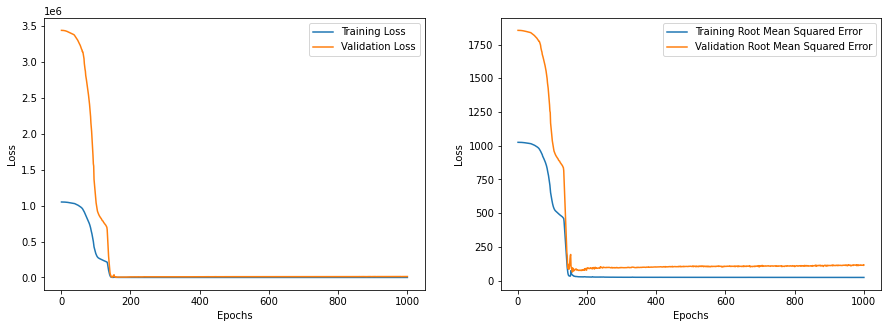

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code creates a figure with two subplots and plots the training and validation loss, as well as the training and validation root mean squared error (RMSE) values over the epochs.

The first line of code creates a figure object with two subplots arranged in a single row. The `fig` variable represents the overall figure, while `ax1` and `ax2` represent the two subplots within the figure.

The next two lines of code set the height and width of the figure using the `set_figheight()` and `set_figwidth()` methods of the `fig` object. These lines adjust the size of the figure to ensure proper visualization.

The subsequent lines of code plot the training and validation loss on the first subplot (`ax1`). The `plot()` function is called on `ax1` with `epochs` as the x-axis values and `loss` and `val_loss` as the y-axis values. The `label` argument is used to provide labels for the respective lines. The `set()` method is then called on `ax1` to set the x-axis and y-axis labels.

Following that, the code plots the training and validation root mean squared error (RMSE) on the second subplot (`ax2`). Similar to the previous lines, the `plot()` function is called on `ax2` with `epochs` as the x-axis values and `root_mean_squared_error` and `val_root_mean_squared_error` as the y-axis values. The `set()` method is used to set the x-axis and y-axis labels.

The `legend()` method is called on both subplots to display a legend indicating the labels of the plotted lines.

Finally, the `plt.show()` function is called to display the figure with the plotted subplots.

By executing this code, two subplots are created within a figure, and the training and validation loss, as well as the training and validation RMSE values, are plotted over the epochs. This visualization allows for a comparative analysis of the model's performance and the convergence of the loss and RMSE values during the training process.

### Predicting the closing stock price of Google

In [44]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

This code uses the trained `GOOG_Model` to make predictions on the testing dataset `GOOG_Test_X`.

The `predict()` method is called on the `GOOG_Model` object, and the input features `GOOG_Test_X` are provided as the argument. This code generates predictions for the testing data using the trained model.

By executing this code, the `GOOG_Model` predicts the target values for the input features in `GOOG_Test_X`. The predictions are stored in the `GOOG_prediction` variable and can be used for further analysis, evaluation, or visualization. These predictions represent the model's estimation of the corresponding target values based on the learned patterns and relationships captured during the training process.

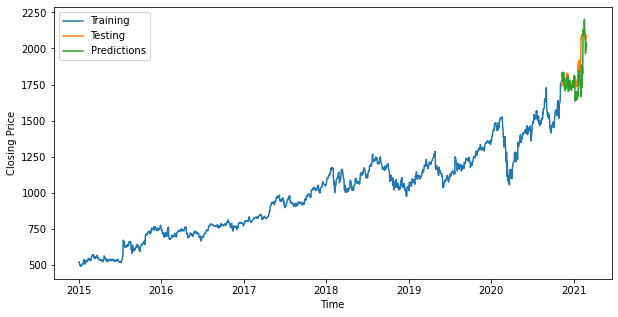

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'][GOOG['Date'] < '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] < '2020-11-07'], label = 'Training')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

This code generates a plot to visualize the actual closing prices of the GOOG stock, along with the predicted closing prices and the separation between the training and testing periods.

The first line of code sets the size of the figure to be displayed using `plt.figure(figsize=(10, 5))`. This determines the dimensions of the plot.

The subsequent lines of code plot the closing prices on the graph. The `plot()` function is used multiple times with different subsets of the data to represent different periods:

- The first `plot()` function call represents the training period by plotting the dates and corresponding adjusted close prices where the dates are earlier than '2020-11-07'.
- The second `plot()` function call represents the testing period by plotting the dates and adjusted close prices where the dates are greater than or equal to '2020-11-07'.
- The third `plot()` function call represents the predicted prices during the testing period by plotting the dates and the predicted closing prices.

The `xlabel()` and `ylabel()` functions are used to label the x-axis as 'Time' and the y-axis as 'Closing Price', respectively.

Lastly, the `legend()` function is called to display a legend on the graph, indicating the labels for the different lines representing the training, testing, and predicted prices.

By executing this code, a plot is generated that shows the actual closing prices of the GOOG stock during the training and testing periods, as well as the predicted closing prices during the testing period. This visualization allows for a visual comparison between the actual and predicted prices, providing insights into the model's performance.

In [46]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 115.66296805524927
MAPE: 0.039782693356206676


This code calculates the root mean squared error (RMSE) and mean absolute percentage error (MAPE) between the predicted closing prices (`GOOG_prediction`) and the actual closing prices (`GOOG_Test_Y`) of the GOOG stock.

The first line of code calculates the RMSE by calling the `mean_squared_error()` function, which measures the average squared difference between the predicted and actual values. The `sqrt()` function from the `math` module is then used to compute the square root of the mean squared error, yielding the RMSE value.

The second line of code calculates the MAPE by first computing the absolute difference between the predicted and actual values. Then, it calculates the mean of the absolute differences divided by the absolute values of the actual prices. This computes the average percentage difference between the predicted and actual prices.

The third and fourth lines of code print the RMSE and MAPE values, respectively. The `f-string` formatting is used to include the values within the printed strings.

By executing this code, the RMSE and MAPE values are computed and printed, providing insights into the accuracy and performance of the model in predicting the closing prices of the GOOG stock. The RMSE represents the average magnitude of the prediction error, while the MAPE provides the average percentage difference between the predicted and actual prices.

Microsoft

In [47]:
MSFT.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  46.66  47.42  46.54  46.76       41.44  27913900.0
1  2015-01-05  46.37  46.73  46.25  46.33       41.06  39673900.0
2  2015-01-06  46.38  46.75  45.54  45.65       40.46  36447900.0
3  2015-01-07  45.98  46.46  45.49  46.23       40.97  29114100.0
4  2015-01-08  46.75  47.75  46.72  47.59       42.18  29645200.0

This code displays the first few rows of the MSFT dataset, allowing us to inspect the data and understand its structure and contents.

By calling the `head()` function on the `MSFT` dataset, it returns the top rows of the dataset. The default number of rows displayed is usually five, but it can be modified by passing an argument to the `head()` function.

The purpose of this code is to provide a quick overview of the dataset, showing the column names and the corresponding values in the initial rows. It helps in understanding the structure of the dataset, the types of data it contains, and any preprocessing or formatting that may be necessary before performing further analysis or modeling.

In [48]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides information about the MSFT dataset, such as the column names, the number of non-null values, and the data types of each column.

By calling the `info()` function on the `MSFT` dataset, it displays a summary of the dataset's metadata. This summary includes the index information, the column names, the count of non-null values in each column, and the data types of the columns.

The purpose of this code is to obtain a high-level understanding of the dataset's structure and contents. It helps in identifying missing values, determining the appropriate data types for each column, and gaining insights into the overall data quality and characteristics. This information is crucial for performing data preprocessing, exploratory data analysis, and modeling tasks.

In [49]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

This code converts the data type of the "Date" column in the MSFT dataset to the datetime format.

By using the `pd.to_datetime()` function on the "Date" column of the MSFT dataset, the values in that column are transformed from their original data type (likely a string or object type) to the datetime data type provided by the pandas library.

The purpose of this code is to ensure that the "Date" column is treated as datetime data, which allows for convenient handling and manipulation of dates and times. Once the conversion is applied, the "Date" column can be used for various time-based operations, such as filtering, grouping, and time series analysis. This conversion is particularly useful when working with temporal data, as it enables the utilization of the datetime functionalities offered by pandas.

Split the Data into Training and Test set.
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [50]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

This code prepares the MSFT dataset for training and testing by splitting it into input and target variables based on a specified date.

The first line assigns the value '2020-10-01' to the variable `MSFT_Date`, which represents the date used to split the dataset into training and testing portions.

The second line calls the `Dataset()` function, passing the MSFT dataset and the `MSFT_Date` as arguments. This function performs the dataset splitting process.

The `Dataset()` function separates the data into four sets: `MSFT_Train_X`, `MSFT_Train_Y`, `MSFT_Test_X`, and `MSFT_Test_Y`. 

- `MSFT_Train_X` represents the input features (X) for the training data, which are derived from the MSFT dataset prior to the `MSFT_Date`.
- `MSFT_Train_Y` represents the corresponding target variable (Y) for the training data.
- `MSFT_Test_X` represents the input features for the testing data, which are derived from the MSFT dataset on or after the `MSFT_Date`.
- `MSFT_Test_Y` represents the corresponding target variable for the testing data.

The purpose of this code is to partition the MSFT dataset into training and testing sets based on the specified date, enabling the use of the dataset for model training and evaluation. The resulting sets can be used to train a machine learning model on the historical data and evaluate its performance on the unseen future data.

### Model Fitting

In [51]:
MSFT_Model = Model()

This code initializes a machine learning model for the MSFT dataset.

The line `MSFT_Model = Model()` creates an instance of the `Model` class, which represents a machine learning model. The specific architecture and configuration of the model are defined in the `Model` function, which is typically a custom function based on the requirements of the problem.

The purpose of this code is to instantiate a model object that will be used for training and prediction tasks. The model can be designed to incorporate various layers, activation functions, and parameters specific to the problem at hand. Once the model object is created, it can be further configured and trained using the available data.

In [52]:
MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the MSFT model for the training process by specifying the optimizer, loss function, and evaluation metrics.

The `compile()` method is called on the `MSFT_Model` object to set up the necessary components for training. 

- The `optimizer` argument defines the optimization algorithm to be used during training. In this case, the Adam optimizer is chosen, which is a popular algorithm for gradient-based optimization.
- The `loss` argument specifies the loss function that will be used to calculate the difference between the predicted and actual values during training. In this case, the mean squared error (MSE) is chosen as the loss function.
- The `metrics` argument defines the metrics that will be computed and displayed during training to evaluate the model's performance. In this case, the root mean squared error (RMSE) is chosen as the evaluation metric.

By executing this code, the `MSFT_Model` is configured with the appropriate optimizer, loss function, and evaluation metric, preparing it for the training process. These settings help guide the model's learning and assess its performance during training iterations.

In [ ]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

This code trains the MSFT model using the training data and validates its performance on the testing data.

The `fit()` method is called on the `MSFT_Model` object, instructing it to train on the input features `MSFT_Train_X` and target variables `MSFT_Train_Y`. The specified number of `epochs` determines the number of times the model will iterate over the training data.

During the training process, the model's performance is evaluated on the validation data provided as `validation_data`, which consists of the input features `MSFT_Test_X` and the corresponding target variables `MSFT_Test_Y`. This validation data allows the model to assess its generalization and performance on unseen data.

The optional `callbacks` argument is used to provide additional functionality during training. In this case, the `callback` function is passed as a callback object, which can perform specific actions at various points during training, such as adjusting the learning rate or saving the best model weights.

By executing this code, the `MSFT_Model` is trained on the training data for the specified number of epochs, and its performance is monitored on the validation data. The model learns patterns and relationships within the training data to make predictions, and the training process aims to minimize the specified loss function. The training history, including the loss and metric values for each epoch, is stored in the `MSFT_hist` object, which can be used for further analysis and visualization.

In [54]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts the training history metrics from the `MSFT_hist` object and assigns them to individual variables.

The `history` attribute of the `MSFT_hist` object contains a dictionary that stores the training history metrics for each epoch during the training process. The first line of the code assigns this dictionary to the variable `history_dict`.

Next, the code retrieves specific metrics from the `history_dict` dictionary and assigns them to separate variables:
- The `loss` variable stores the training loss values for each epoch.
- The `root_mean_squared_error` variable stores the training root mean squared error (RMSE) values for each epoch.
- The `val_loss` variable stores the validation loss values for each epoch.
- The `val_root_mean_squared_error` variable stores the validation RMSE values for each epoch.

The last line of code defines the `epochs` variable as a range of integers from 1 to the length of the `loss` list plus 1. This range represents the x-axis values for plotting the training history metrics.

By executing this code, the training history metrics are extracted and stored in separate variables, enabling further analysis, visualization, and interpretation of the model's performance during training and validation.

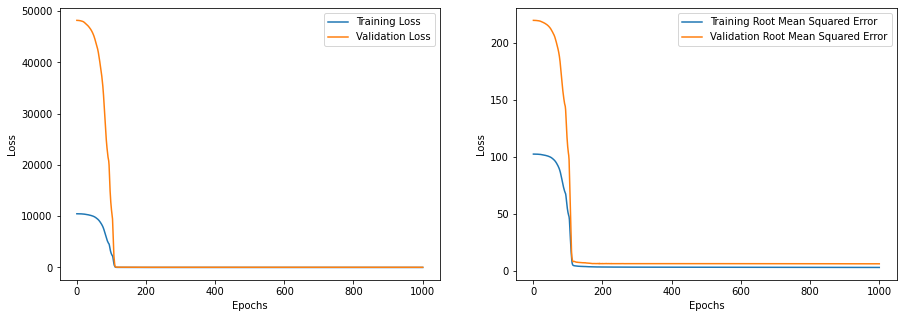

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code plots the training and validation loss, as well as the training and validation root mean squared error (RMSE), over the course of the training epochs.

The first line of code creates a figure object `fig` with two subplots (`ax1` and `ax2`) arranged side by side.

The next two lines set the dimensions of the figure using `set_figheight()` and `set_figwidth()` functions, adjusting the height to 5 units and the width to 15 units.

The subsequent lines plot the training and validation loss on `ax1` and the training and validation RMSE on `ax2`. The `plot()` function is used to create the line plots, with the `epochs` serving as the x-axis values and the respective metrics (`loss`, `val_loss`, `root_mean_squared_error`, `val_root_mean_squared_error`) as the y-axis values. The `label` parameter is set to provide a label for each line.

Additional formatting is applied to each subplot using the `set()` function to set the x-axis label (`xlabel`), y-axis label (`ylabel`), and to customize the appearance of the plot.

The `legend()` function is called on each subplot to display a legend that identifies the plotted lines.

Finally, `plt.show()` is used to display the figure with the plotted metrics.

By executing this code, a figure with two subplots is shown, where the first subplot (`ax1`) displays the training and validation loss curves, and the second subplot (`ax2`) displays the training and validation RMSE curves. This visual representation helps in understanding the behavior and convergence of the model during training and evaluation.

### Predicting the closing stock price of Microsoft

In [56]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

This code uses the trained `MSFT_Model` to make predictions on the testing data `MSFT_Test_X`.

The `predict()` method is called on the `MSFT_Model` object, with `MSFT_Test_X` as the input data. The model takes the input data and generates predictions for the target variable.

By executing this code, the `MSFT_Model` uses the learned patterns and relationships it has acquired during training to predict the target variable values for the testing data `MSFT_Test_X`. The resulting predictions are stored in the `MSFT_prediction` variable and can be further analyzed or used for evaluation purposes.

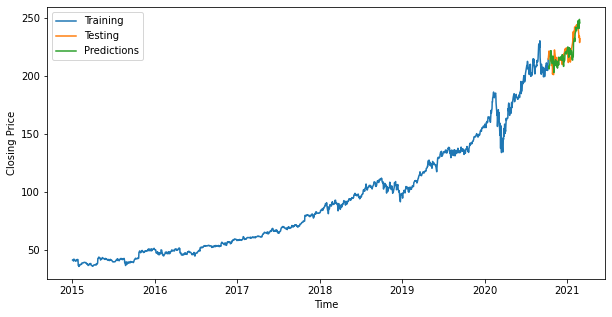

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

This code generates a line plot to visualize the actual closing prices, training data, testing data, and predicted values of the Microsoft (MSFT) stock.

The `plt.figure(figsize=(10, 5))` line creates a new figure object with a specified width and height.

The subsequent lines use the `plt.plot()` function to create the line plot:
- The first `plt.plot()` line plots the actual closing prices from the training period (`MSFT['Date'] < '2020-10-12'`) against the corresponding dates, labeling it as "Training".
- The second `plt.plot()` line plots the actual closing prices from the testing period (`MSFT['Date'] >= '2020-10-09'`) against the corresponding dates, labeling it as "Testing".
- The third `plt.plot()` line plots the predicted closing prices from the testing period (`MSFT_prediction.reshape(-1)`) against the corresponding dates, labeling it as "Predictions".

The `plt.xlabel()` and `plt.ylabel()` functions are used to set the x-axis and y-axis labels to "Time" and "Closing Price", respectively.

The `plt.legend()` function adds a legend to the plot, placing it at the "best" location determined by the plot.

By executing this code, a line plot is generated, displaying the actual closing prices, training data, testing data, and predicted values of the MSFT stock over time. This visualization helps in comparing the predicted values with the actual data and evaluating the performance of the model in capturing the underlying patterns in the stock prices.

In [58]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.2306768444560205
MAPE: 0.02214984775145576


This code calculates two evaluation metrics, root mean squared error (RMSE) and mean absolute percentage error (MAPE), to assess the performance of the predictions made by the `MSFT_Model` on the testing data.

The first line calculates the RMSE by comparing the predicted values (`MSFT_prediction`) with the actual values of the testing data (`MSFT_Test_Y.reshape(-1, 5)`) using the `mean_squared_error()` function from the `sklearn.metrics` module. The calculated mean squared error is then passed to the `math.sqrt()` function to obtain the RMSE.

The second line calculates the MAPE by subtracting the predicted values from the actual values, taking the absolute values of the differences, dividing them by the absolute values of the actual values, and then calculating the mean of these ratios.

The `print()` function is used to display the calculated RMSE and MAPE. The `f-string` syntax is employed to include the values of `rmse` and `mape` within the printed string.

By executing this code, the RMSE and MAPE values are computed and printed, providing insights into the accuracy and performance of the predictions made by the `MSFT_Model`. Lower values of RMSE and MAPE indicate better predictive performance.